In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import pdb
from astropy.table import QTable
import astropy.units as u
import astropy.constants as const
import math

plt.rc('font', family='Computer Modern')
plt.rc('text',usetex=True)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plot_dpi = 300


In [13]:
(1 * u.solMass).to(u.earthMass).value

332948.344548224

In [14]:
eqonly_dir = './final_data/runs_eq_only/'
eqorb_dir = './final_data/runs_eqorb/'
eqorbmesc_dir = './eqorbmesc/'

# lets make a ecc distribution
probecc_data = QTable.read('probecc_comma.dat',format='ascii.no_header', names=['ecc','%inbin','cum%'])
planet_data = QTable.read('planets.csv',format='ascii')
rad_data = planet_data['pl_radj'] * (const.R_jup/const.R_earth)



def get_IC_data(n):
    '''
    n = sim number
    '''
    foldername = "%05i"%n
    folderdir = eqorb_dir + foldername
    b_file = open(folderdir + '/b.in','r')
    c_file = open(folderdir + '/c.in','r')
    star_file =open(folderdir + '/star.in','r')
    vpl_file = open(folderdir + '/vpl.in','r')
    b_content = b_file.read()
    c_content = c_file.read()
    star_content = star_file.read()
    vpl_content = vpl_file.read()
    b_content = b_content.split('\n')
    c_content = c_content.split('\n')
    star_content = star_content.split('\n')
    vpl_content = vpl_content.split('\n')
    
    b_ecc_line = 9
    c_ecc_line = 9
    b_rad_line = 5
    c_rad_line = 5
    b_semi_line = 10
    c_semi_line = 10
    b_mass_line = 4
    c_mass_line = 4
    
    b_ecc = b_content[b_ecc_line]
    c_ecc = c_content[c_ecc_line]
    b_ecc = float(b_ecc.split('\t\t')[1])
    c_ecc = float(c_ecc.split('\t\t')[1])
    
    b_rad = b_content[b_rad_line]
    c_rad = c_content[c_rad_line]
    b_rad = float(b_rad.split('\t\t')[1])*-1
    c_rad = float(c_rad.split('\t\t')[1])*-1
    
    b_semi = b_content[b_semi_line]
    c_semi = c_content[c_semi_line]
    b_semi = float(b_semi.split('\t\t')[1])
    c_semi = float(c_semi.split('\t\t')[1])
    
    b_mass = b_content[b_mass_line]
    c_mass = c_content[c_mass_line]
    b_mass = float(b_mass.split('\t\t')[1])*-1
    c_mass = float(c_mass.split('\t\t')[1])*-1
    
    # now to read in atmmassfrac
    print(foldername,end='\r')
    return b_ecc, c_ecc, b_rad, c_rad, b_semi, c_semi, b_mass, c_mass
    
i = 0
n = 25000
b_ecc_list = np.zeros(shape=(n))
c_ecc_list = np.zeros(shape=(n))
b_rad_list = np.zeros(shape=(n))
c_rad_list = np.zeros(shape=(n))
b_semi_list = np.zeros(shape=(n))
c_semi_list = np.zeros(shape=(n))
b_mass_list = np.zeros(shape=(n))
c_mass_list = np.zeros(shape=(n))

while i <= n-1:
    (b_ecc_list[i], c_ecc_list[i], b_rad_list[i], c_rad_list[i], b_semi_list[i], c_semi_list[i],
     b_mass_list[i], c_mass_list[i]) = get_IC_data(i)
    i += 1

    
# now we have the data
# so lets make it into a histogram and save that shit



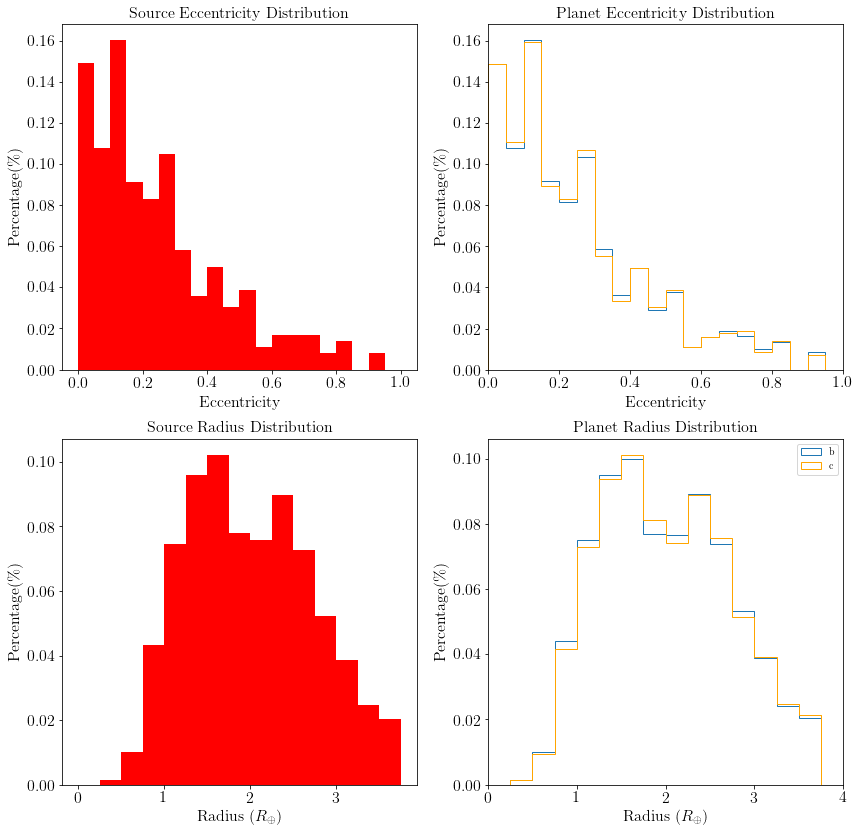

In [15]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(14,14)


x = np.arange(0,1,0.05)
y = probecc_data['cum%']
ecc_in_bin = probecc_data['%inbin']

x_rad = np.arange(0,4,0.25)

bar = ax[0,0].bar(probecc_data['ecc']+0.025, ecc_in_bin, width=0.05,color='red', label='Source')
ecc_hist_b = ax[0,1].hist(b_ecc_list,bins=x,weights=np.zeros_like(b_ecc_list)+1./b_ecc_list.size,histtype='step', label='b')
ecc_hist_c = ax[0,1].hist(c_ecc_list,bins=x,weights=np.zeros_like(c_ecc_list)+1./c_ecc_list.size,histtype='step',color='orange', label='c')
ax[0,1].set(xlabel='Eccentricity', ylabel='P(Eccentricity)',title='Planet Eccentricity Distributions', xlim=(0,1))
#ax[0,0].set(title='Source Eccentricity Distribution',xlabel='Eccentricity',ylabel='P(Eccentricity)')

ax[0,0].set_xlabel("Eccentricity",fontsize=16)
ax[0,0].set_ylabel("Percentage(\%)",fontsize=16)
ax[0,0].set_title("Source Eccentricity Distribution",fontsize=16)

ax[0,1].set_xlabel("Eccentricity",fontsize=16)
ax[0,1].set_ylabel("Percentage(\%)",fontsize=16)
ax[0,1].set_title("Planet Eccentricity Distribution",fontsize=16)


rad_dist = ax[1,0].hist(rad_data,bins=x_rad,weights=np.zeros_like(rad_data)+1./rad_data.size, color='red', label='Source')
#ax[1,0].set(title='Source Radius Distribution', xlabel='Radius ($R_{\oplus}$)', ylabel='P(Radius)')
y_rad = rad_dist[0].cumsum()
rad_b_hist = ax[1,1].hist(b_rad_list,bins=x_rad,weights=np.zeros_like(b_rad_list)+1./b_rad_list.size,histtype='step', label = 'b')
rad_c_hist = ax[1,1].hist(c_rad_list,bins=x_rad,weights=np.zeros_like(c_rad_list)+1./c_rad_list.size,histtype='step',color='orange', label='c')
ax[1,1].set(xlabel='Radius ($R_{\oplus}$)', ylabel='P(Radius)', title='Radius Distributions', xlim=(0,4))
ax[1,1].legend(loc=0)


ax[1,0].set_xlabel("Radius ($R_{\oplus}$)",fontsize=16)
ax[1,0].set_ylabel("Percentage(\%)",fontsize=16)
ax[1,0].set_title("Source Radius Distribution",fontsize=16)

ax[1,1].set_xlabel("Radius ($R_{\oplus}$)",fontsize=16)
ax[1,1].set_ylabel("Percentage(\%)",fontsize=16)
ax[1,1].set_title("Planet Radius Distribution",fontsize=16)

fig.savefig('./figs/ecc_rad_dist.png',bbox_inches='tight', dpi=plot_dpi);

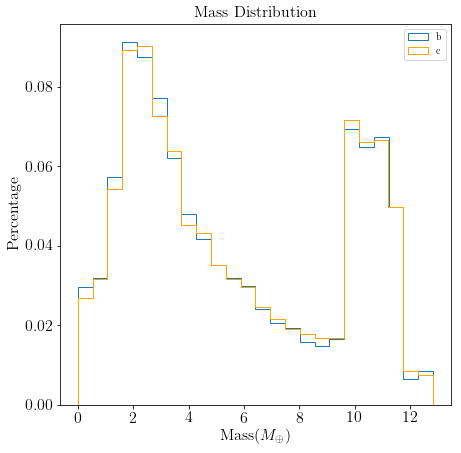

In [16]:
# now lets plot mass
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

bins=24

ax.hist(b_mass_list, bins=bins, weights=np.zeros_like(b_mass_list)+1./b_mass_list.size, histtype='step', label='b')
ax.hist(c_mass_list, bins=bins, weights=np.zeros_like(c_mass_list)+1./c_mass_list.size, color='orange', histtype='step',label='c');
ax.legend(loc=0)
ax.set_xlabel("Mass($M_{\oplus}$)", fontsize=16)
ax.set_ylabel("Percentage",fontsize=16)
ax.set_title("Mass Distribution", fontsize=16)
fig.savefig('./figs/mass_dist.png',bbox_inches='tight', dpi=plot_dpi)

In [164]:
final_data_eqonly = "./final_data/runs_eq_only"

def check_merge(log_dir):
    log_file = open(log_dir+"/log","r")
    log_content = log_file.readlines()
    merge_line = log_content[-3]
    if merge_line[:11] == "HALT: Merge":
        bMerge = 1
    else:
        bMerge = 0    
    return bMerge


def calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c):
    # mass in units of earthmasses
    # semi in units of AU
    mass_star = (mass_star *u.solMass).to(u.earthMass).value # solmass to earth mass
    G = (const.G.to(u.AU**3 / (u.earthMass*u.s**2))).value # to units fo AU^3/earthmass s^2
    n_b = np.sqrt(G*(mass_star + mass_b)/(semi_b**3))
    alpha = semi_c / semi_b
    strength = (mass_c/semi_b)* alpha**2 * ecc_b * ecc_c * (np.sqrt(1-ecc_b**2)/(n_b*semi_b**2*ecc_b))
    return strength

def get_merged_data(runs_dir,bAddModule=0):
    '''
    this function is gonna get all the merged data
    '''
    runs_list = np.array([]) # we are going to store the run names in this array
    bad_sim_list = np.array([])
    bMerge_list = np.array([]) # store the sims that merged
    modules = "Eqtide"
    atm_lost_sims = np.array([])
    # lets add em in 
    for dir_name in os.walk(runs_dir):
        if dir_name[0] != runs_dir: # the first one in os.walk is the source dir eg runs_dir
            runs_list = np.append(runs_list, dir_name[0])
    print("Found %i Sims\n"%len(runs_list))
    
    n_sims = len(runs_list)

    mass_b_list = np.array([])
    semi_b_list = np.array([])
    ecc_b_list = np.array([])
    bMerge_eqtide_list = np.array([])
    
    # lets see what modules are being used
    if runs_dir.find('orb') != -1: # are we using distorb? (yes)
        bDistorb = 1
        modules = modules + "+Distorb"
        mass_c_list = np.array([])
        semi_c_list = np.array([])
        ecc_c_list = np.array([])
        strength_list = np.array([])
        if runs_dir.find('mesc') != -1: # are we using atmesc? (yes)
            bAtmesc = 1
            modules = modules + "+Atmesc"
            bMerge_eqorbmesc_list = np.array([])
            bMerge_eqorb_list = np.array([])
        else: #we are not using atmesc
            bAtmesc = 0
            bMerge_eqorb_list = np.array([])
    elif runs_dir.find('mesc') != -1: #eqtide+atmesc
        bDistorb = 0
        bAtmesc = 1
        modules = modules + "+Atmesc"
        lost_env_counter = 0
        Lum_grid_counter = 0
        bMerge_eqmesc_list = np.array([])
    else:
        bDistorb = 0
        bAtmesc = 0
    print("Fetching data for %s runs..."%modules)
    
    # now lets iterate over them and read in the final data
    i = 0
    for idx,sim_dir in enumerate(runs_list):
        print ("%0.1f %%"%(i/n_sims*100), end='\r')
        try:
            # lets check if distorb is used, to read in c ICs as well:
            sim_idx = int(sim_dir.split(runs_dir)[1][1:])
            if bDistorb: # eqtide+distorb
                star_file = sim_dir + '/star.in'
                star_file = open(star_file,'r')
                star_content = star_file.readlines()
                mass_star = np.float64(star_content[3].split('\t\t')[1][:-1]) # solar mass
                
                c_file = sim_dir + '/c.in'
                c_file = open(c_file,'r')
                c_content = c_file.readlines()
                mass_c = np.float64(c_content[4].split('\t\t')[1][:-1])*-1
                mass_c_list = np.append(mass_c_list, mass_c)
                semi_c = np.float64(c_content[10].split('\t\t')[1][:-1])
                semi_c_list = np.append(semi_c_list, semi_c)
                ecc_c = np.float64(c_content[9].split('\t\t')[1][:-1])
                ecc_c_list = np.append(ecc_c_list, ecc_c)

                b_file = sim_dir + '/b.in'
                b_file = open(b_file,'r')
                b_content = b_file.readlines()
                mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
                mass_b_list = np.append(mass_b_list, mass_b)
                semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
                semi_b_list = np.append(semi_b_list, semi_b)
                ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
                ecc_b_list = np.append(ecc_b_list, ecc_b)

                strength = calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c)

                if math.isinf(strength):
                    strength = -1
                    print("Strength == inf for sim %i"%sim_idx)

                strength_list = np.append(strength_list,strength)

                if bAtmesc: #eqtide+distorb+atmesc
                    print("do eqorbmesc stuff!")
                    
                # test for distorb merge
                bMerge_eqorb = check_merge(sim_dir)
                bMerge_eqorb_list = np.append(bMerge_eqorb_list,bMerge_eqorb)
                # test for eqtide merge
                eq_sim_dir = sim_dir.split('runs_eqorb')
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)
                
                    
            elif bAtmesc: #eqtide+atmesc
                #if sim_idx == 10937:
                #    pdb.set_trace()
                log_file = sim_dir + "/log"
                log_file = open(log_file,'r')
                log_content = log_file.read()
                if log_content.find("HALT: star reached the edge of the luminosity grid") != -1:
                    Lum_grid_counter += 1
                b_file = sim_dir + '/b.in'
                b_file = open(b_file,'r')
                b_content = b_file.readlines()
                mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
                mass_b_list = np.append(mass_b_list, mass_b)
                semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
                semi_b_list = np.append(semi_b_list, semi_b)
                ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
                ecc_b_list = np.append(ecc_b_list, ecc_b)
                
                b_fwd = open(sim_dir+"/system.b.forward",'r')
                b_fwd_content = b_fwd.readlines()
                tidalqenv_b = b_fwd_content[0].split(' ')[-3]
                for line in b_fwd_content:
                    #pdb.set_trace()
                    tidalq_output = line.split(' ')[-3]
                    envmass = np.float64(line.split(' ')[-4])
                    if (envmass == 0):
                        atm_lost_sims = np.append(atm_lost_sims, sim_idx)
                        lost_env_counter += 1
                        break
                
                # test for merge
                bMerge_eqmesc = check_merge(sim_dir)
                bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge_eqmesc)
                # check for eqtide merge
                eq_sim_dir = sim_dir.split("runs_eqmesc")
               # pdb.set_trace()
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)

            else: #eqtide
                b_file = sim_dir + '/b.in'
                b_file = open(b_file,'r')
                b_content = b_file.readlines()
                mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
                mass_b_list = np.append(mass_b_list, mass_b)
                semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
                semi_b_list = np.append(semi_b_list, semi_b)
                ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
                ecc_b_list = np.append(ecc_b_list, ecc_b)
                # test for merge
                bMerge = check_merge(sim_dir)
                bMerge_list = np.append(bMerge_list, bMerge)
                    
        except IndexError: # the runs that didnt complete. lets delete those. 
            bad_sim_list = np.append(bad_sim_list,sim_dir)
            # to filter out the unfinished sims
            bMerge = -9999
            bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge)
            if bDistorb:
                if bAtmesc: #eqtide+distorb+atmesc
                    bMerge_eqorbmesc_list = np.append(bMerge_eqorbmesc_list, bMerge)
                else: #eqtide+distorb
                    bMerge_eqorb_list = np.append(bMerge_eqorb_list, bMerge)
            elif bAtmesc: #eqtide+atmesc
                bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge)
        i += 1        
        
    # now to control for what to return based on module
    print("%i Sims produced errors when reading:\n "%bad_sim_list.shape)
    print(bad_sim_list)
    if (bDistorb == 1 and bAtmesc == 0): #eqtide + distorb
        output_list = np.array([runs_list, mass_b_list, mass_c_list, semi_b_list,
                                semi_c_list, ecc_b_list, ecc_c_list, strength_list,
                                bMerge_eqtide_list, bMerge_eqorb_list])
        output_list = output_list.transpose()
    elif (bDistorb == 0 and bAtmesc == 1): #eqtide + atmesc
        print("%i Sims out of %i lost their envelopes\n"%(lost_env_counter, len(runs_list)))
        print("%i Sims had stars reach end of lum. grid\n"%Lum_grid_counter)
        
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_list])
        output_list = output_list.transpose()
    else: # eqtide
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_list])
        output_list = output_list.transpose()
        
    return output_list
    

    
def make_contour(x_data, y_data, z_data, names='default', labels = ['Semi (AU)', 'Mass($M_\oplus$)', 'Ecc'], 
                 x_binwidth=0.01, y_binwidth=0.5, xlim=(0,0.04), levels=[0.1,0.2,0.3,0.4,0.5,0.6],log=False):
    '''
    here, the final_data input is (~25000,3) dataset, where each row repesents one simulation ()
    [:,0] = mass, [:,1] = semi, [:,3] = ecc
    '''
    name = labels[0]+'_vs_' + labels[1]+names
    
    if log == True:
        x_axis = np.logspace(4,16,24)
        y_axis = np.arange(np.min(y_data),math.ceil(np.max(y_data)), y_binwidth)
        #pdb.set_trace()
    else:
        x_axis = np.arange(np.min(x_data),np.max(x_data),x_binwidth)
        y_axis = np.arange(0,math.ceil(np.max(y_data)), y_binwidth)
    z_axis = np.zeros(shape=(len(y_axis)-1,len(x_axis)-1))
    
    print("Shaping Contour Data...")
    for y_idx, y in enumerate(y_axis[:-1]):
        y_lower_bin = y
        y_upper_bin = y_axis[y_idx+1]
        
        for x_idx, x in enumerate(x_axis[:-1]):
            x_lower_bin = x
            x_upper_bin = x_axis[x_idx+1]
            x_bin = np.array([])

            for x_i, y_i, z_i in zip(x_data, y_data, z_data):
                if (y_i<y_upper_bin and y_i > y_lower_bin and x_i < x_upper_bin and x_i > x_lower_bin):
                    x_bin = np.append(x_bin, z_i)
            avg_z_in_x_bin = np.mean(x_bin)
            z_axis[y_idx][x_idx] = avg_z_in_x_bin
            #y_avg_xs = np.append(y_avg_xs, avg_z_in_x_bin)
            
    print("Making Eccentricty Plot")
    
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    if log == True:
        ax.set_xscale('log')
    matplotlib.rcParams.update({'font.size': 16})
    ct = ax.contour(z_axis,levels=levels, 
                    extent=(x_axis[0],x_axis[-1],y_axis[0],y_axis[-1]))
    ax.set_xlabel(labels[0], fontsize=16)
    ax.set_ylabel(labels[1],fontsize=16)
    ax.set_title("Avg "+labels[2]+" Contours for Merged Planets", fontsize=16)
    ax.set_xlim(xlim)
    ax.clabel(ct,inline=True)
    fig.savefig('./figs/'+name+'.png',bbox_inches='tight', dpi=plot_dpi)
    return z_axis
        
        


In [25]:
# there are some cases where mass and envmass turn negative?? ex: 10937

final_data_eqmesc_dir = "./final_data/runs_eqmesc"
final_data_eqmesc = get_merged_data(final_data_eqmesc_dir)
final_data_eqmesc
#eqmesc_merge_mask = np.where(final_data_eqmesc[:,4].astype(float) == 1)
#merged_eqmesc = final_data_eqmesc[eqmesc_merge_mask]

Found 14944 Sims

Fetching data for Eqtide+Atmesc runs...
2 Sims produced errors when reading:
 
['./final_data/runs_eqmesc/10937' './final_data/runs_eqmesc/20070']
7248 Sims out of 14944 lost their envelopes

11622 Sims had stars reach end of lum. grid



array([ array(['./final_data/runs_eqmesc/04533', './final_data/runs_eqmesc/03110',
       './final_data/runs_eqmesc/14872', ...,
       './final_data/runs_eqmesc/01011', './final_data/runs_eqmesc/07723',
       './final_data/runs_eqmesc/02452'], 
      dtype='<U32'),
       array([ 11.09199974,  10.21249152,   3.30634825, ...,   9.9044417 ,
         6.98200408,   7.52881561]),
       array([ 0.10090485,  0.02371917,  0.1375202 , ...,  0.02694144,
        0.13202803,  0.05250625]),
       array([ 0.09551018,  0.31208739,  0.2107671 , ...,  0.36239409,
        0.06576502,  0.31134739]),
       array([], dtype=float64)], dtype=object)

In [26]:
#fig,ax = plt.subplots(1,1)

#ax.hist(strength_data[:,1], bins=np.arange(np.min(strength_data[:,1]),np.max(strength_data[:,1],1e15)))

In [27]:
# for eq_only        
# [0:1] = mass; [1:2] = semi; [2:3] = ecc; structure required to make contour
final_b_data_eqonly = get_merged_data(final_data_eqonly)
merged_data_eqtide = final_b_data_eqonly[np.where(final_b_data_eqonly[:,4].astype(float) == 1)]
merged_data_eqtide.shape


Found 25000 Sims

Fetching data for Eqtide runs...
0 Sims produced errors when reading:
 
[]


(1494, 5)

Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([[ 0.40172568,  0.93583253,         nan,         nan],
       [ 0.31437229,  0.9163868 ,  0.94422893,         nan],
       [ 0.29761621,  0.9004013 ,  0.93693774,         nan],
       [ 0.29329609,  0.9354123 ,  0.92774677,  0.94771741],
       [ 0.24333152,  0.84517243,  0.91398905,  0.9495836 ],
       [ 0.29546615,  0.94047059,         nan,  0.94105712],
       [ 0.27419219,  0.87029659,  0.9124297 ,  0.93355239],
       [ 0.30096876,  0.90311604,  0.94238616,         nan],
       [ 0.25934062,  0.83053189,  0.94765881,         nan],
       [ 0.31600462,  0.93196706,  0.93951088,  0.94694547],
       [ 0.2959388 ,  0.9189973 ,  0.92585068,         nan],
       [ 0.27817966,  0.88722513,  0.93933183,         nan]])

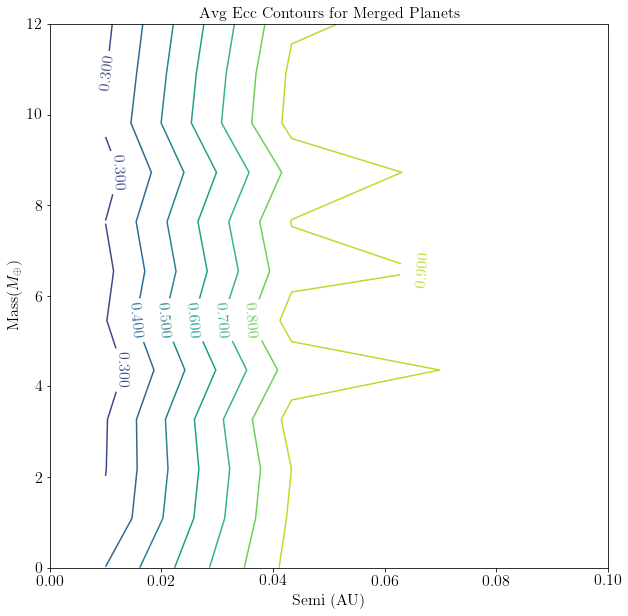

In [165]:
# x = semi; y = mass; z = ecc
semib_eqonly = merged_data_eqtide[:,2].astype(np.float64) # x 
massb_eqonly = merged_data_eqtide[:,1].astype(np.float64) # y 
eccb_eqonly = merged_data_eqtide[:,3].astype(np.float64) # z
levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#pdb.set_trace()
make_contour(semib_eqonly,massb_eqonly,eccb_eqonly,
                              y_binwidth=1.0,x_binwidth=0.025,xlim=(0,0.1), levels=levels,
                              names='eq_only_merged')

1494


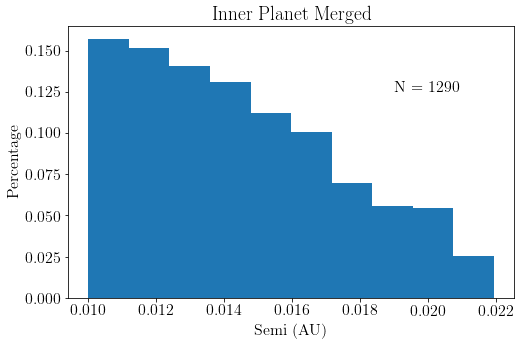

In [30]:
# lets make histogram of merged cases and their semis
merged_semis_eqtide = merged_data_eqtide[:,2].astype(np.float64)
print(len(merged_semis_eqtide))
# 80% have merged with semis less than 0.022 AU; lets filter all the others out
p025semi_mask = np.where(merged_semis_eqtide <= 0.022)
merged_semis_eqtide = merged_semis_eqtide[p025semi_mask]
n = merged_semis_eqtide.shape[0]
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
bins = 10
ax.hist(merged_semis_eqtide,bins=bins, weights=np.zeros_like(merged_semis_eqtide)+1./merged_semis_eqtide.size)
ax.text(0.019,0.125, 'N = %i'%(n))
ax.set_xlabel('Semi (AU)')
ax.set_ylabel('Percentage')
ax.set_title('Inner Planet Merged');
fig.savefig("./figs/eqtide_merge.png", bbox_inches='tight',dpi=plot_dpi)

In [31]:
1494/25000

0.05976

In [32]:
# for eqorb
# for contour, need data in form of:
# [0:1] = mass; [1:2] = semi; [2:3] = ecc
final_data_eqorb = "./final_data/runs_eqorb"
final_data_eqorb = get_merged_data(final_data_eqorb)
merged_data_eqorb = final_data_eqorb[np.where(final_data_eqorb[:,9].astype(float) == 1)]
merged_data_eqorb.shape



Found 25000 Sims

Fetching data for Eqtide+Distorb runs...
73 Sims produced errors when reading:
 
['./final_data/runs_eqorb/19937' './final_data/runs_eqorb/12588'
 './final_data/runs_eqorb/01737' './final_data/runs_eqorb/07278'
 './final_data/runs_eqorb/20938' './final_data/runs_eqorb/18767'
 './final_data/runs_eqorb/13235' './final_data/runs_eqorb/08219'
 './final_data/runs_eqorb/12941' './final_data/runs_eqorb/06153'
 './final_data/runs_eqorb/13114' './final_data/runs_eqorb/14558'
 './final_data/runs_eqorb/18244' './final_data/runs_eqorb/15027'
 './final_data/runs_eqorb/06513' './final_data/runs_eqorb/02120'
 './final_data/runs_eqorb/05353' './final_data/runs_eqorb/09692'
 './final_data/runs_eqorb/10643' './final_data/runs_eqorb/06307'
 './final_data/runs_eqorb/00865' './final_data/runs_eqorb/04276'
 './final_data/runs_eqorb/17109' './final_data/runs_eqorb/22785'
 './final_data/runs_eqorb/10218' './final_data/runs_eqorb/04994'
 './final_data/runs_eqorb/23427' './final_data/runs_eqor

(2134, 10)

Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


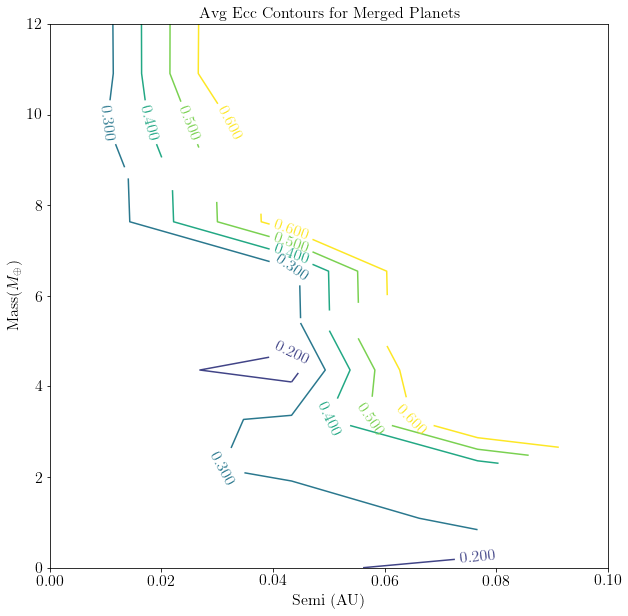

In [167]:
b_merged_eqorb = np.array([merged_data_eqorb[:,1], merged_data_eqorb[:,3], merged_data_eqorb[:,5]]).transpose()
b_merged_eqorb = b_merged_eqorb.astype(np.float64)
massb_eqorb = merged_data_eqorb[:,1].astype(np.float64)
semib_eqorb = merged_data_eqorb[:,3].astype(np.float64)
eccb_eqorb = merged_data_eqorb[:,5].astype(np.float64)

eqorb_contour = make_contour(semib_eqorb, massb_eqorb, eccb_eqorb, y_binwidth=1.0,x_binwidth=0.025, xlim=(0,0.1), names='eqorb_merged')

In [133]:
eqorb_contour.shape

(12, 4)

In [35]:
# now lets filter out the ones that didnt complete...
comp_mask = np.where((final_data_eqorb[:,9].astype(float) != -9999) | (final_data_eqorb[:,8].astype(float) != -9999))
completed_eqorb_data = final_data_eqorb[comp_mask]

# now lets filter the runs where bMerge_eqtide = 0 and bMerge_eqorb = 1
# bMerge_eqtide idx = 8, bMerge_eqorb idx = 9
distorb_caused_merge = np.where((completed_eqorb_data[:,9].astype(float) == 1) & (completed_eqorb_data[:,8].astype(float) == 0))


# this is the data to use when determining how distorb affects merging
orb_merge_eq_nomerge_data = completed_eqorb_data[distorb_caused_merge]


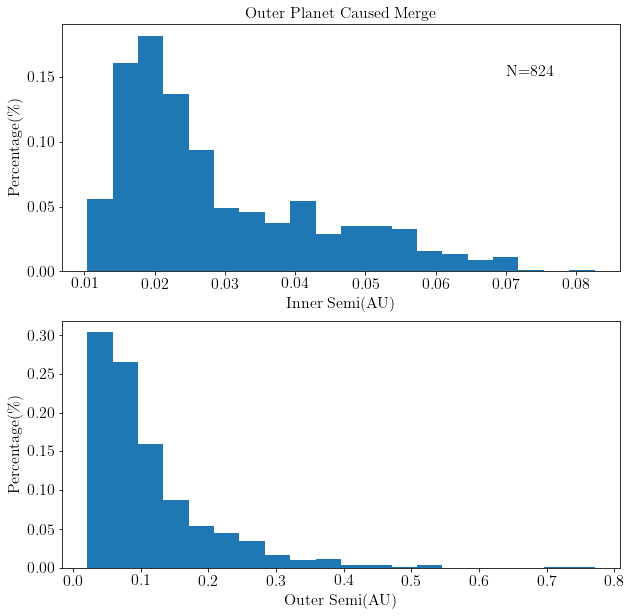

In [36]:
def make_eqorb_merge_eq_nomerge_hist(orb_merge_eq_nomerge_data, bins = 20):
    # we want to make a histogram of semi_b
    semi_b = orb_merge_eq_nomerge_data[:,3].astype(float)
    semi_c = orb_merge_eq_nomerge_data[:,4].astype(float)
    
    fig,ax = plt.subplots(2,1)
    fig.set_size_inches(10,10)
    ax[0].hist(semi_b, bins=bins, weights = np.zeros_like(semi_b)+1./semi_b.size)
    ax[0].set_xlabel("Inner Semi(AU)", fontsize=16)
    ax[0].set_ylabel("Percentage(\%)", fontsize=16)
    ax[0].set_title("Outer Planet Caused Merge", fontsize=16)
    #ax[0].set(xlabel="Inner Semi(AU)", ylabel="Percentage(\%)", title="Outer Planet Caused Merge")
    ax[0].text(0.07,0.15,"N=%i"%semi_b.shape[0], fontsize=16)
    
    ax[1].hist(semi_c, bins=bins, weights = np.zeros_like(semi_c)+1./semi_c.size)
    ax[1].set_xlabel("Outer Semi(Au)", fontsize=16)
    ax[1].set_ylabel("Percentage(\%)", fontsize=16)
    ax[1].set(xlabel="Outer Semi(AU)", ylabel="Percentage(\%)")
    fig.savefig("./figs/outer_planet_merge.png", bbox_inches='tight',dpi=plot_dpi)
    
    
    
make_eqorb_merge_eq_nomerge_hist(orb_merge_eq_nomerge_data)

In [37]:
# the addition of an outer planet can extend the distance at which the inner planet can merge. 
# cool!!
np.min(np.float64(final_data_eqorb[:,-3]))

35601.676789584664

In [ ]:
final_data_eqorb[0]

Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


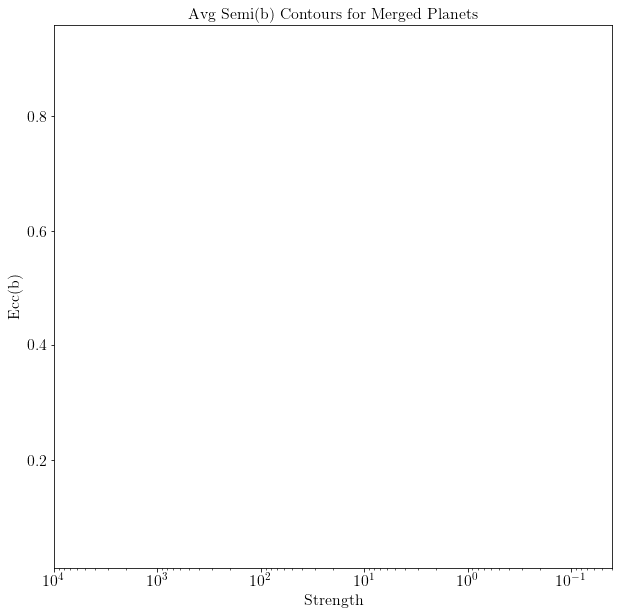

In [151]:
# now for strength contour
#strength_data = np.array([final_data_eqorb[:,5], final_data_eqorb[:,-3], final_data_eqorb[:,3]]).transpose()
strength_data = final_data_eqorb[:,-3].astype(np.float64)
strength_data.shape
strength_mask = np.where(strength_data <1e12)
masked_strength_data = strength_data[strength_mask]
labels = ['Strength', 'Ecc(b)','Semi(b)']
levels=[0.2,0.22,0.24,0.26,0.28,0.3]
#lims = 

strength_contour = make_contour(strength_data, semib_eqorb, eccb_eqorb,
             labels=labels, log=True,y_binwidth = 0.05)

In [150]:
strength_contour.shape

(19, 23)

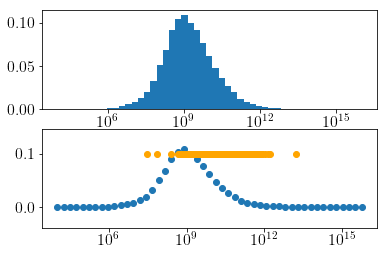

In [160]:
fig,ax = plt.subplots(2,1)

x_bins = np.logspace(4,16,50)
hist_data = ax[0].hist(strength_data, x_bins, weights=np.zeros_like(strength_data)+1./strength_data.size)
ax[0].set_xscale('log')
orb_merge_eq_nomerge_data[:,-3].astype(np.float64)

dummy_points = np.zeros(len(orb_merge_eq_nomerge_data[:,-3])) + 0.1

bins = hist_data[1][:-1]
counts = hist_data[0]
ax[1].scatter(bins,counts)
ax[1].scatter(orb_merge_eq_nomerge_data[:,-3].astype(np.float64),dummy_points, color='orange')
ax[1].set_xscale('log')

20229


(35601.676789584664, 10000000000.0)

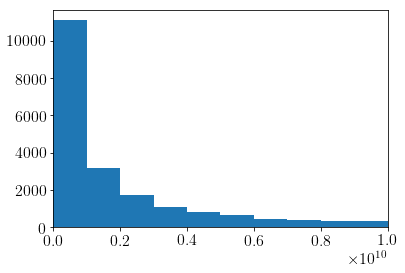

In [43]:
upper_bound = 0.5e9
upper_bound = 1e10
strength_mask = np.where(strength_data <= upper_bound)
shaped_strength_data = strength_data[strength_mask]
print(shaped_strength_data.shape[0])
fig,ax = plt.subplots(1,1)

ax.hist(shaped_strength_data,bins=10)
ax.set_xlim(min(shaped_strength_data),upper_bound)

In [44]:

greather_avg_strength_mask = np.where(orb_merge_eq_nomerge_data[:,-3].astype(np.float64) < 1e10)
large_strength_org_merged_eq_nomerge = orb_merge_eq_nomerge_data[greather_avg_strength_mask]
large_strength_org_merged_eq_nomerge.shape
#print("%0.2E"%np.mean(strength_data))

(220, 10)

In [ ]:
# so the above logic shows that for the cases where the outer planet caused the inner planet to merge(~800)
# only 8 were greater than the mean strength 

In [ ]:
# cite murray and dermott that disturbing function scales with with e proportional to this function.
# can normalize strength?

In [ ]:
# make histogram below
# planets that lost envelopes
# send rory the hill stab case

In [ ]:
# lets find the sims that are said to be hillstable, but shouldnt be

fake_hillstab_sims = np.array([13380,10282,369,20941,7058,5404,2793,5556,6203,16812])

for sim_num in fake_hillstab_sims:
    sim_name = "%05i"%sim_num
    # lets read in b and c. 
    b_file = open("./final_data/runs_eqorb/"+sim_name+"/b.in",'r')
    c_file = open("./final_data/runs_eqorb/"+sim_name+"/c.in",'r')
    b_content = b_file.readlines()
    c_content = c_file.readlines()
    # what do we need to read in?
    
    
    
    
    
    

In [ ]:
lehmer_test_dir = "/home/dm1681/vplanet/testing/lehmer17/"
log_file = open(lehmer_test_dir+"log","r")
log_content = log_file.read()
log_content.find("Envelope lost!")

In [ ]:
# case that lost a lot of atmosphere, compare eqtide+atmesc w/ eqtide orbital params. 
# run atmesc cases. 

#mardling and lin 2004; raymond 2006 (some destruction), 

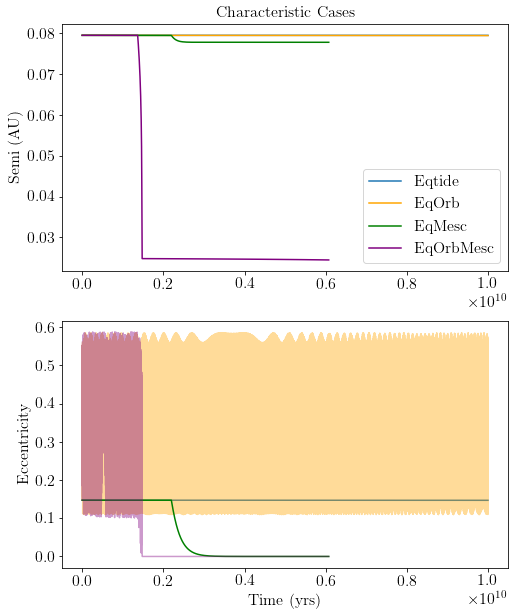

In [61]:
# lets find a characteristic case for eqtide only, showing the evolution of semi and ecc.
# big_q


eqtide_fwd_data = np.loadtxt('./final_data/char/eqtide/system.b.forward', dtype=np.float64)
time_eqtide = eqtide_fwd_data[:,0]
semi_eqtide = eqtide_fwd_data[:,1]
ecc_eqtide = eqtide_fwd_data[:,2]

eqorb_fwd_data = np.loadtxt('./final_data/char/eqorb/system.b.forward', dtype=np.float64)
time_eqorb = eqorb_fwd_data[:,0]
semi_eqorb = eqorb_fwd_data[:,1]
ecc_eqorb = eqorb_fwd_data[:,2]
#pdb.set_trace()

eqmesc_fwd_data = np.loadtxt('./final_data/char/eqmesc/system.b.forward', dtype=np.float64)
time_eqmesc = eqmesc_fwd_data[:,0]
semi_eqmesc = eqmesc_fwd_data[:,1]
ecc_eqmesc = eqmesc_fwd_data[:,2]
envmass_eqmesc = eqmesc_fwd_data[:,-3]

eqorbmesc_fwd_data = np.loadtxt('./final_data/char/eqorbmesc/system.b.forward', dtype=np.float64)
time_eqorbmesc = eqorbmesc_fwd_data[:,0]
semi_eqorbmesc = eqorbmesc_fwd_data[:,1]
ecc_eqorbmesc = eqorbmesc_fwd_data[:,2]
envmass_eqorbmesc = eqorbmesc_fwd_data[:,-3]



fig,ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].plot(time_eqtide, semi_eqtide, label='Eqtide')
ax[0].plot(time_eqorb, semi_eqorb, color='orange', label='EqOrb')
ax[0].plot(time_eqmesc, semi_eqmesc, color='green', label='EqMesc')
ax[0].plot(time_eqorbmesc, semi_eqorbmesc, color='purple',label='EqOrbMesc')
ax[0].set_ylabel('Semi (AU)', fontsize=16)
ax[0].set_title("Characteristic Cases", fontsize=16)
ax[0].legend(loc=0)


ax[1].plot(time_eqtide, ecc_eqtide)
ax[1].plot(time_eqorb, ecc_eqorb, color='orange', alpha = 0.4)
ax[1].plot(time_eqmesc, ecc_eqmesc, color='green')
ax[1].plot(time_eqorbmesc, ecc_eqorbmesc, color='purple', alpha = 0.4)
ax[1].set_ylabel('Eccentricity', fontsize=16)
ax[1].set_xlabel('Time (yrs)', fontsize=16)

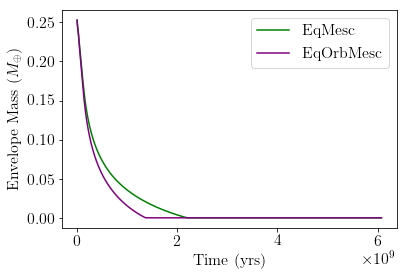

In [58]:
fig,ax = plt.subplots(1,1)

ax.plot(time_eqmesc, envmass_eqmesc, color='green', label='EqMesc')
ax.plot(time_eqorbmesc, envmass_eqorbmesc, color='purple', label='EqOrbMesc')
ax.legend(loc=0)
ax.set_ylabel('Envelope Mass ($M_\oplus$)',fontsize=16)
ax.set_xlabel('Time (yrs)',fontsize=16)




